In [128]:
# 1. 导入需要的库
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
import csv
# 2. 所有需要访问的网站url列表
website_list = {
        #'1_Amazon Essentials' : "https://www.amazon.com/Amazon-Essentials-Loose-Fit-Short-Sleeve-Crewneck/product-reviews/B0775PN4MN/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&pageNumber=2&reviewerType=all_reviews&captcha_verified=1&claim_type=EmailAddress&new_account=1",
        #'2_GMC Tshirts G1100': "https://www.amazon.com/Gildan-V-Neck-T-Shirts-Multi-Small/product-reviews/B077ZL67P2/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
        #'3_Hanes Store Tshirts(1-pack)': "https://www.amazon.com/Hanes-Heavyweight-Sleeve-T-Shirt-1-Pack/product-reviews/B0BWF35RSH/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
        #'4_Fruit of the Loom': "https://www.amazon.com/Fruit-Loom-Pocket-T-Shirt-Multipack/product-reviews/B08F33KLP7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
        #'5_Russell Athletic': "https://www.amazon.com/Russell-Athletic-Dri-Power-Moisture-Protection/product-reviews/B0C3NBLK35/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
        #'6_Comfort Colors': "https://www.amazon.com/Comfort-Colors-Adult-Sleeve-1717/product-reviews/B0BYFWLJXV/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
        #'7_Carhartt Store': "https://www.amazon.com/Carhartt-Heavyweight-Short-Sleeve-Pocket-T-Shirt/product-reviews/B0C1CW6ZCJ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
        #'8_Lucky Brand Men': "https://www.amazon.com/Lucky-Brand-Venice-Burnout-Notch/product-reviews/B08BW46XBV/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&pageNumber=2&reviewerType=all_reviews",
        #'9_Kingsted for Men': "https://www.amazon.com/Kingsted-Mens-T-Shirts-Comfortable-American/product-reviews/B07PTZ4433/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&pageNumber=2&reviewerType=all_reviews",
        #'10_Under Armour Men': "https://www.amazon.com/Under-Armour-Sportstyle-Sleeve-T-shirt/product-reviews/B08BXQK3S3/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        #'11_Gildan Ultra Cotton': "https://www.amazon.com/Gildan-Cotton-Sleeve-T-Shirt-2-Pack/product-reviews/B0768349VV/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '12_Amazon Essentials pack2': "https://www.amazon.com/product-reviews/B0C4YQ8WWW/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '13_Gildan Cotton Stretch': "https://www.amazon.com/Gildan-Cotton-Stretch-T-Shirt-X-Large/product-reviews/B084HFLKFW/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '14_Under Armour Men Tech2.0': "https://www.amazon.com/Under-Armour-T-Shirt-Heather-X-Large/product-reviews/B07CZMXW59/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '15_Gildan Adult DryBlend Workwear': "https://www.amazon.com/Gildan-DryBlend-Workwear-T-Shirts-XX-Large/product-reviews/B07CX3XMFT/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '16_Gildan Adult Ultra Cotton G2300': "https://www.amazon.com/Gildan-Cotton-T-Shirt-Pocket-2-Pack/product-reviews/B07M61KJN7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '17_Hanes Mens Short pack2': "https://www.amazon.com/Hanes-Mens-Short-Sleeve-Jersey-Pocket/product-reviews/B0C3YBXFYM/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '18_ELIY BASIC Women': "https://www.amazon.com/Ownow-Womens-Sleeve-Pleated-Shirring/product-reviews/B096FWTMVZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '19_GLIGLITTR Women Summer ': "https://www.amazon.com/Womens-Sunflower-Summer-Blouse-Graphic/product-reviews/B09NFDWYDX/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '20_Nlife Bring On The Sunshine': "https://www.amazon.com/Nlife-Sunshine-Graphic-Sleeves-Sweaters/product-reviews/B09MD1GYMS/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '21_MIHOLL Womens Shirts': "https://www.amazon.com/MIHOLL-Womens-Shirts-Casual-Blouses/product-reviews/B07PN2PFTJ/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2",
        '22_Hanes Women Nano T-Shirt': "https://www.amazon.com/Hanes-Womens-T-Shirt-Medium-White/product-reviews/B00KRYLKH6/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2"
}

# 抓取数据需求分析
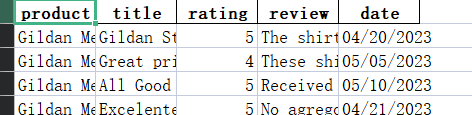

    通过查看，已经被处理的数据，仅仅是review经过预处理后的数据，因此只需要获得相应的 reviews 即可，其他部分均可忽略
        当然，reviews的所属产品还是可以在csv或者xlsx中进行标注

In [117]:
## 01 初始化 webdriver，以及定制 options[需要探究 option]

options = webdriver.ChromeOptions()
# options.add_argument("--proxy-sever = 218.60.8.99:3129")
# options.add_argument("disable-web-security")
options.add_argument("--lang=en-US")
# 3种 agent 代理选择
#options.add_argument('user-agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36 Edg/87.0.664.75"')
#options.add_argument('user-agent = "Mozilla/5.0 (Macintosh; Intel Mac OSX 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8"')
#options.add_argument('User-Agent = "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:80.0) Gecko/20100101 Firefox/80.0"')

# 为加快网页加载速度，Perfs中加入禁止加载图片和CSS样式的需求
prefs = {"profile.managed_default_content_settings.images": 2, 'permissions.default.stylesheet': 2}

# 然后添加进options中
options.add_experimental_option("prefs", prefs)

# 最后初始化driver，选用的驱动已经放置在了当前文件路径下
wd = webdriver.Chrome(service=Service(r'chromedriver.exe'),options=options)
# 设置全局等待时间，如果超过了10秒，那就返回错误，没办法了
    # wd.implicitly_wait(10)        # 为element寻找等待时间
    # wd.set_page_load_timeout(10)  # 为页面加载等待时间
    # wd.timeouts().implicitlyWait(10, TimeUnit.SECONDS) # 前两者似乎没起到作用，新增一个方法
# 以上三者均没用，采用新方法
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.support.wait import WebDriverWait

# 均无效，最终采用 决定url翻页方式

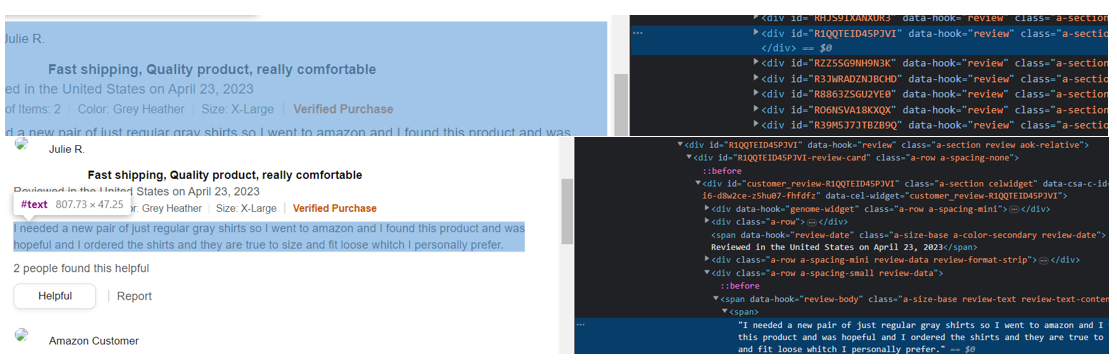

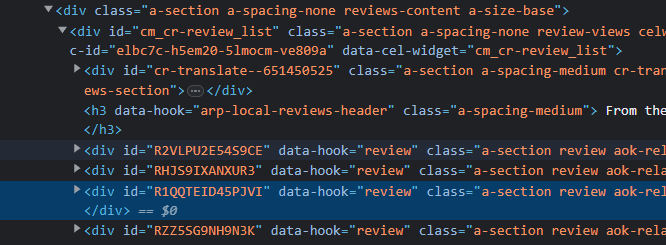

# 观察 html 元素特点，以便selenium元素选择
            似乎amazon，如果网址比较老旧，可能需要登陆账户
                因此在打开网页时，可以尝试登录账户，然后进行selenium自动化操作
    通过观察html元素发现，所有的review，均位于一个 div 元素下
        其class属性，class="a-section a-spacing-none reviews-content a-size-base"
        
    经过 console 编辑后发现
      CSS selector 表示为：
        [class="a-section a-spacing-none reviews-content a-size-base"]  [data-hook="review"]   [data-hook="review-body"] > span
      注意：此时你会获取20条评论，其中前10条来在美国，后10条可能来自其他国家(不同语言)，因此选取时候，仅仅选择前10条
    简单书写方式： div.a-row.a-spacing-small.review-data > span > span ，这是直接在console 中复制的，不需要自己手动查找 
    
    
    Next page button 其 CSS 地址
        #cm_cr-pagination_bar > ul > li.a-last
        
        注意返回值可能有两个，我们只需要前一个，因为前一个来自美国，后一个则是来自可能其他国家(不同语言)的购买page
        
    # 该方法可能无效 text_elements_list：       div.a-row.a-spacing-small.review-data > span > span
    next_page_elements_list:   #cm_cr-pagination_bar > ul > li.a-last
    
    #         # 02 获取button元素后完后，点击，然后进入下一页
    #         next_page_elements = wd.find_elements(By.CSS_SELECTOR, next_page_elements_list)
    #         print(next_page_elements)
    #         time.sleep(5)
    #         next_page_elements[0].click()

    #         print(type(next_page_elements))
    #         print(type(next_page_element))

In [132]:
# 注意 amazon 提供的 reviews 数据 最大页数为500页，因此上限一般设置为490，防止抛错
import pandas as pd 
pages_list = [90,60,460,270,80,300,20,60,90,390,400]
webno = 0

In [133]:
import time
## 02 进入网页，然后获取 review 列表，尝试简单使用for循环不断爬取
text_elements_list = "[class='a-section a-spacing-none reviews-content a-size-base']  [data-hook='review']   [data-hook='review-body'] > span"
next_page_elements_list = "#cm_cr-pagination_bar > ul > li.a-last > a"

for name,url in website_list.items():
    # 进入其中一个 url
    reviews_list = []
    page = 2
    while True:
        print("current_page:",page)
        str_list = url.split("next_2")
        str0 = str_list[0] + "next_"
        str1, str2 = str_list[1].split("Number=2")
        str1 = str1 + "Number="
        new_url = str0 + str(page) + str1 + str(page) + str2
        wd.get(new_url)
        # 该睡眠时间是为了避免被检测为爬虫从而被墙，也有等待元素加载完成，不过后面代码已经写了该功能
        # time.sleep(0.5)
        text_elements = WebDriverWait(wd, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, text_elements_list)))
            
        # 01 将 获取的 文本内容全部导入 reviewlist
        for i in range(len(text_elements)):
            reviews_list.append({"product":name,"review":text_elements[i].text})
        
        # 03 记录page+1
        page+=1
        
        # 设置最大页数
        if page == pages_list[webno]:
            break
    webno += 1

    df = pd.DataFrame(reviews_list)
    df.to_excel(f'D:/zhuomian/DO/jupy LAB/2023NLPcourse/Practice_1/Scrape/{name}_scraped_data.xlsx', index=False)
    
    # break
    

current_page: 2
current_page: 3
current_page: 4
current_page: 5
current_page: 6
current_page: 7
current_page: 8
current_page: 9
current_page: 10
current_page: 11
current_page: 12
current_page: 13
current_page: 14
current_page: 15
current_page: 16
current_page: 17
current_page: 18
current_page: 19
current_page: 20
current_page: 21
current_page: 22
current_page: 23
current_page: 24
current_page: 25
current_page: 26
current_page: 27
current_page: 28
current_page: 29
current_page: 30
current_page: 31
current_page: 32
current_page: 33
current_page: 34
current_page: 35
current_page: 36
current_page: 37
current_page: 38
current_page: 39
current_page: 40
current_page: 41
current_page: 42
current_page: 43
current_page: 44
current_page: 45
current_page: 46
current_page: 47
current_page: 48


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=113.0.5672.93)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x006E8893+48451]
	(No symbol) [0x0067B8A1]
	(No symbol) [0x00585058]
	(No symbol) [0x0056D073]
	(No symbol) [0x005CDEBB]
	(No symbol) [0x005DBFD3]
	(No symbol) [0x005CA0B6]
	(No symbol) [0x005A7E08]
	(No symbol) [0x005A8F2D]
	GetHandleVerifier [0x00948E3A+2540266]
	GetHandleVerifier [0x00988959+2801161]
	GetHandleVerifier [0x0098295C+2776588]
	GetHandleVerifier [0x00772280+612144]
	(No symbol) [0x00684F6C]
	(No symbol) [0x006811D8]
	(No symbol) [0x006812BB]
	(No symbol) [0x00674857]
	BaseThreadInitThunk [0x765F00C9+25]
	RtlGetAppContainerNamedObjectPath [0x779C7B4E+286]
	RtlGetAppContainerNamedObjectPath [0x779C7B1E+238]
